# Web3: Scraping Web Data

## Warmup 0

In [1]:
import requests

# The documentation is only 1 page!
# https://beautiful-soup-4.readthedocs.io/en/latest/
from bs4 import BeautifulSoup

## Warmup 1: HTML table and hyperlinks
In order to scrape web pages, you need to know the HTML syntax for tables and hyperlinks.

#### Warmup 1a: Add another row.

<table>
  <tr>
    <th>University</th>
    <th>Department</th>
  </tr>
  <tr>
    <td>UW-Madison</td>
    <td><a href = "https://www.cs.wisc.edu/">Computer Sciences</a></td>
  </tr>
  <tr>
    <td>UW-Madison</td>
    <td><a href = "https://stat.wisc.edu/">Statistics</a></td>
  </tr>
   <tr>
    <td>UW-Madison</td>
    <td><a href = "https://cdis.wisc.edu/">CDIS</a></td>
  </tr>
  <tr>
    <td>UC Berkeley</td>
    <td><a href = "https://eecs.berkeley.edu/">Electrical Engineering and Computer Sciences</a></td>
    </tr>
</table>

## Warmup 1b: Does indentation matter?

**Answer:** No!

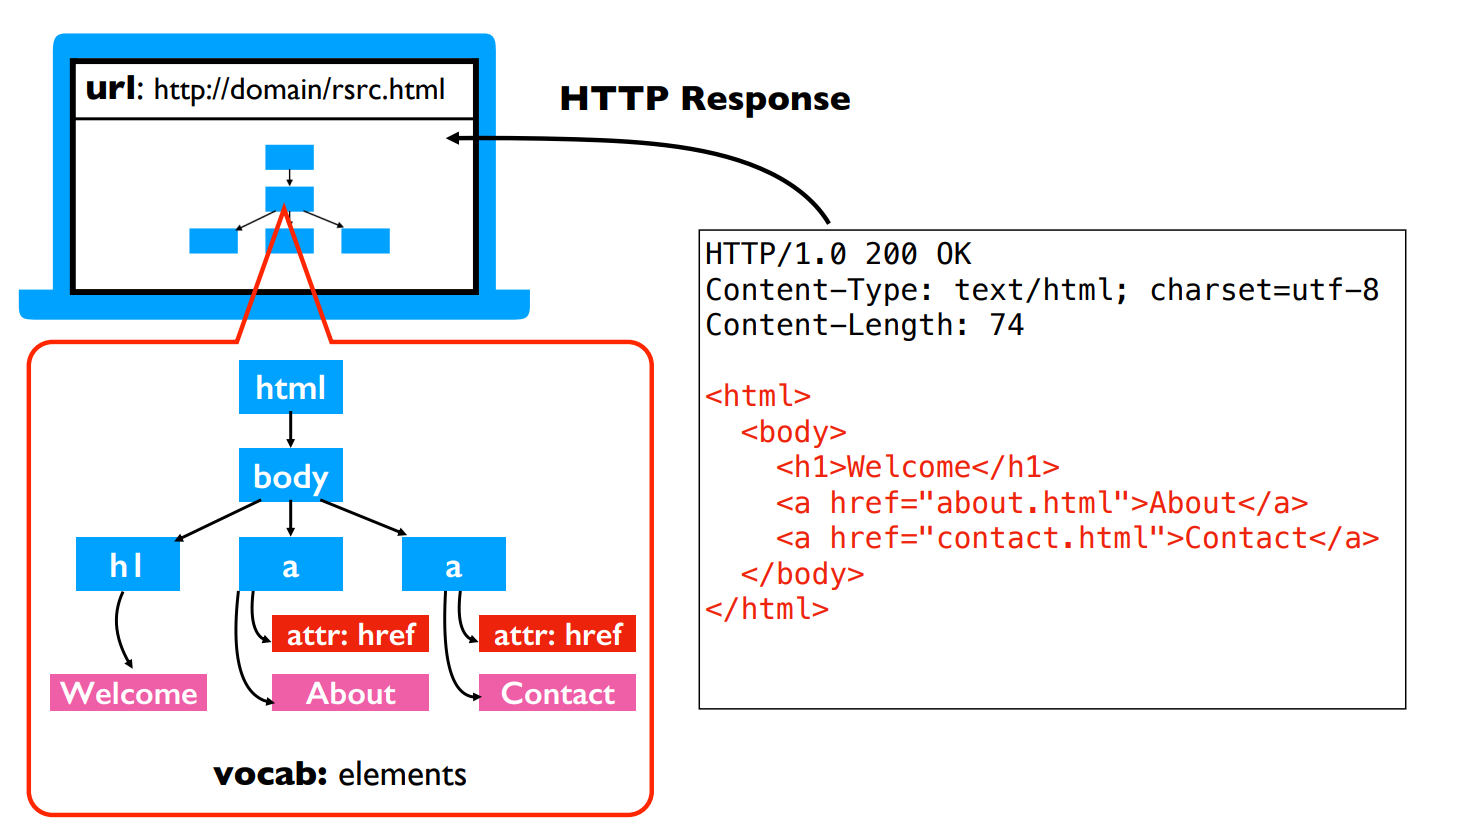

## Warmup 1c: Consider the following HTML...

`<a href="https://www.google.com/"><b>Google</b> It</a>`

* **DOM** stands for *DOCUMENT OBJECT MODEL*
* An HTML page looks like a *TREE*
* `<b>Google</b>` is an *ELEMENT NODE*
* `href` is an *ATTRIBUTE*
* `"It"` is *TEXT* (also a *child*)

<a href="https://www.google.com/"><b>Google</b> It</a>

## Warmup 2: GET Syllabus Information

Read the contents of the page: `https://cs220.cs.wisc.edu/s24/syllabus.html`

In [2]:
# write your code here
url = "https://cs220.cs.wisc.edu/s24/syllabus.html"
r = requests.get(url)

# make sure there is no error
r.raise_for_status()

# read the entire contents of the page into a single string variable
contents = r.text

# split the contents into list of strings using newline separator
content_list = contents.split("\n")
len(content_list)

454

## Warmup 2a: Find all sentences that contain "title"

In [3]:
# write your code here
title_sentences = [sentence for sentence in content_list if "title" in sentence.lower()]
title_sentences

['    <title>CS220</title>']

## Warmup 2b: Extract title tag's value

In [4]:
# write your code here
title_tag = title_sentences[0]
print(title_tag)
title_tag = title_tag.strip()
print(title_tag)
title_tag_parts = title_tag.split(">")
print(title_tag_parts)
title_details = title_tag_parts[1]
title_detail_parts = title_details.split("<")
title_detail_parts[0] # finally, we are able to extract the title tag's data
# Takeaway:  It would be nice if there were a module that could make finding easy!

    <title>CS220</title>
<title>CS220</title>
['<title', 'CS220</title', '']


'CS220'

### Learning Objectives:

- Using the Document Object Model of web pages
    - describe the 3 things a DOM element may contain, and give examples of each
    - given an html string, identify the correct DOM tree of elements
- Create BeautifulSoup objects from an html string and use prettify to display
- Use the BeautifulSoup methods `find` and `find_all` to find particular elements by their tag
- Inspect a BeautufulSoup element to determine the contents of a web page using `get_text()`, children, and attrs
- Use BeautifulSoup to scrape a live web site. 

### Document Object Model

In order to render a HTML page, most web browsers use a tree structure called Document Object Model (DOM) to represent the HTML page as a hierarchy of elements.

<div>
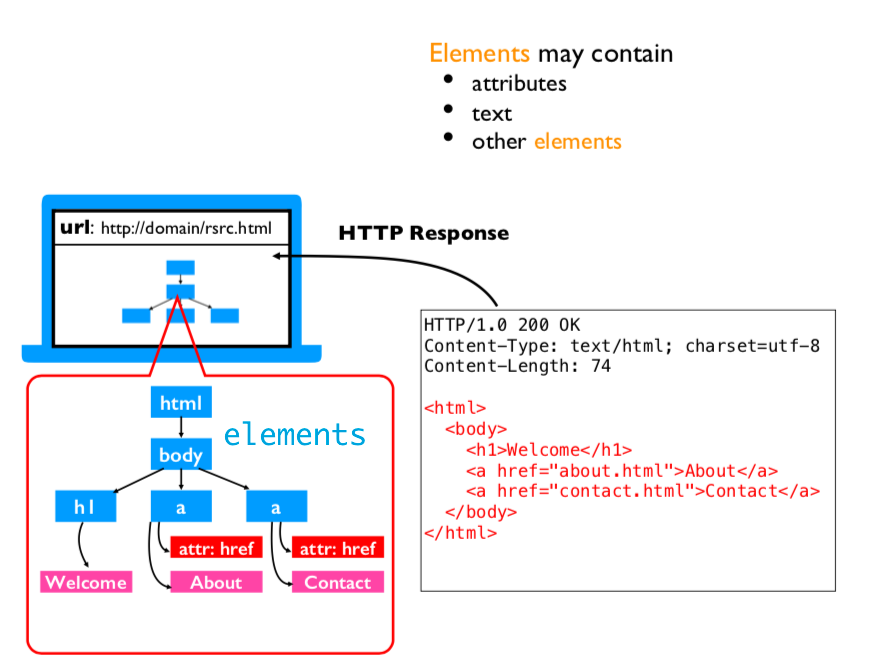
</div>

### Take a look at the HTML in the below cell.

<b>To Do List</b>
<ul>
    <li>Eat Healthy</li>
    <li><a href="https://docs.python.org/3/library/time.html#time.sleep">Sleep</a> <b>More</b></li>
    <li>Exercise</li>
</ul>

### BeautifulSoup constructor
- takes html and parses it
- Syntax: `BeautifulSoup(<html_string>, "html.parser")`
- Second argument specifies what kind of parsing we want done

In [5]:
html_string = "<b>To Do List</b><ul><li>Eat Healthy</li><li><a href=\"https://docs.python.org/3/library/time.html#time.sleep\">Sleep</a> <b>More</b></li><li>Exercise</li></ul>"
bs_obj = BeautifulSoup(html_string, "html.parser") 

type(bs_obj)

bs4.BeautifulSoup

## BeautifulSoup operations
- `prettify()`        returns a formatted representation of the raw HTML

### A  BeautifulSoup object can be searched for elements using:
- `find("")`         returns the first element matching the tag string, None otherwise
- `find_all("")`     returns an iterable of all matching elements (HTML 'tags'), empty iterable otherwise

### Beautiful Soup Elements can be inspected by using:
- `get_text()`     returns the text associated with this element, if applicable; does not return the child elements associated with that element
- `.children`      all children of this element (can be converted into a list)
- `.attrs`          the atribute associated with that element / tag.

#### `prettify` returns a formatted representation of the raw HTML

In [6]:
print(bs_obj.prettify())

<b>
 To Do List
</b>
<ul>
 <li>
  Eat Healthy
 </li>
 <li>
  <a href="https://docs.python.org/3/library/time.html#time.sleep">
   Sleep
  </a>
  <b>
   More
  </b>
 </li>
 <li>
  Exercise
 </li>
</ul>



#### `find` returns the first HTML 'tag' matching the string `"b"`

In [7]:
element = bs_obj.find("b")
print(type(element))
element

<class 'bs4.element.Tag'>


<b>To Do List</b>

#### `get_text` extracts the text within an element

In [8]:
text = element.get_text()
print(text, type(text))

To Do List <class 'str'>


#### `find` returns `None` if it cannot find that element

In [9]:
assert bs_obj.find("ul") != None # assert that this html string has a <ul> tag

In [10]:
assert bs_obj.find("a") == None # assert that this does not have an <a> tag

AssertionError: 

#### `find_all` returns an iterable of all matching elements (HTML 'tags')

In [11]:
element_list = bs_obj.find_all("b")
element_list

[<b>To Do List</b>, <b>More</b>]

In [12]:
print(type(element_list), element_list[0])

<class 'bs4.element.ResultSet'> <b>To Do List</b>


#### We can use a `for` loop to loop through this 'list'

In [13]:
for element in element_list:
    print(element.get_text())

To Do List
More


#### Unlike `find`, `find_all` returns an empty 'list', when there are no matching elements.

In [14]:
print(bs_obj.find_all("Sleep")) # only searches for elements, not text

[]


In [15]:
print(bs_obj.find("Sleep")) # if not present returns None 

None


## Exercise 1: Find all list elements in `bs_obj`

In [16]:
# write your code here
li_elements = bs_obj.find_all("li")
li_elements

[<li>Eat Healthy</li>,
 <li><a href="https://docs.python.org/3/library/time.html#time.sleep">Sleep</a> <b>More</b></li>,
 <li>Exercise</li>]

## Exercise 2: Find all bold list items in the 2nd list element

In [17]:
# write your code here
li_elements[1].find_all("b")

[<b>More</b>]

#### DOM trees are hierarchical. You can use `.children` on any element to gets its children.

In [18]:
element = bs_obj.find("ul")
print(element.prettify())
children_list = list(element.children)
children_list

<ul>
 <li>
  Eat Healthy
 </li>
 <li>
  <a href="https://docs.python.org/3/library/time.html#time.sleep">
   Sleep
  </a>
  <b>
   More
  </b>
 </li>
 <li>
  Exercise
 </li>
</ul>



[<li>Eat Healthy</li>,
 <li><a href="https://docs.python.org/3/library/time.html#time.sleep">Sleep</a> <b>More</b></li>,
 <li>Exercise</li>]

#### You can also loop through this list of children

In [19]:
for child in children_list:
    print(child.get_text())

Eat Healthy
Sleep More
Exercise


#### Notice that `get_text()` only returns the actual text and not the HTML formatting.

In [20]:
for li_item in bs_obj.find("ul").children:
    bold_item = li_item.find("b")
    if bold_item != None:
        print(bold_item.get_text())

More


## Exercise 3: Get the title of the Syllabus Page using Beautiful Soup

Recall that the url is: `https://cs220.cs.wisc.edu/s24/syllabus.html`

In [21]:
# write your code here 
url = "https://cs220.cs.wisc.edu/s24/syllabus.html"
r = requests.get(url)

# make sure there is no error
r.raise_for_status()

# read the entire contents of the page into a single string variable
contents = r.text

# use BeautifulSoup to extract title
syllabus_obj = BeautifulSoup(contents, "html.parser")
syllabus_obj.find("title").get_text()

'CS220'

## Exercise 4: Use Beautiful Soup to get all the headings (h1 and h2 elements) from the Beautiful Soup documentation

The url is: `https://beautiful-soup-4.readthedocs.io/en/latest/`

In [22]:
# write your code here 
url = "https://beautiful-soup-4.readthedocs.io/en/latest/"
r = requests.get(url)

# make sure there is no error
r.raise_for_status()

# read the entire contents of the page into a single string variable
contents = r.text

# use BeautifulSoup to extract title
bs_docs = BeautifulSoup(contents, "html.parser")
headings = list(bs_docs.find_all("h1")) + list(bs_docs.find_all("h2"))
# ... or even better ...
headings = bs_docs.find_all(["h1", "h2"])

for heading in headings:
    print(heading.get_text().replace("Â¶", ""))

Beautiful Soup Documentation
Getting help
Quick Start
Installing Beautiful Soup
Problems after installation
Installing a parser
Making the soup
Kinds of objects
Tag
NavigableString
BeautifulSoup
Comments and other special strings
Navigating the tree
Going down
Going up
Going sideways
Going back and forth
Searching the tree
Kinds of filters
find_all()
Calling a tag is like calling find_all()
find()
find_parents() and find_parent()
find_next_siblings() and find_next_sibling()
find_previous_siblings() and find_previous_sibling()
find_all_next() and find_next()
find_all_previous() and find_previous()
CSS selectors
Modifying the tree
Changing tag names and attributes
Modifying .string
append()
extend()
NavigableString() and .new_tag()
insert()
insert_before() and insert_after()
clear()
extract()
decompose()
replace_with()
wrap()
unwrap()
smooth()
Output
Pretty-printing
Non-pretty printing
Output formatters
get_text()
Specifying the parser to use
Differences between parsers
Encodings
Output 

#### New syntax: You can use `"""some really long string"""` to split a string across multiple lines.

In [23]:
html_string = """
<table>
  <tr>
    <th>University</th>
    <th>Department</th>
  </tr>
  <tr>
    <td>UW-Madison</td>
    <td><a href = "https://www.cs.wisc.edu/">Computer Sciences</a></td>
  </tr>
  <tr>
    <td>UW-Madison</td>
    <td><a href = "https://stat.wisc.edu/">Statistics</a></td>
  </tr>
   <tr>
    <td>UW-Madison</td>
    <td><a href = "https://cdis.wisc.edu/">CDIS</a></td>
  </tr>
  <tr>
    <td>UC Berkeley</td>
    <td><a href = "https://eecs.berkeley.edu/">Electrical Engineering and Computer Sciences</a></td>
    </tr>
</table>
"""

## Example 1: Get all the table headers

In [24]:
bs_obj = BeautifulSoup(html_string, "html.parser")
th_elements = bs_obj.find_all("th") # works only if there is one table in that whole HTML

for th in th_elements:
    print(th.get_text())

University
Department


## Example 2: Get the first anchor element

In [25]:
first_anchor = bs_obj.find("a")
first_anchor.get_text()

'Computer Sciences'

#### You can get the attributes associated with an element using `.attrs` on that element object. Return value will be a `dict` mapping each attribute to its value.

In [26]:
first_anchor_attributes = first_anchor.attrs
first_anchor_attributes

{'href': 'https://www.cs.wisc.edu/'}

In [27]:
print(type(first_anchor_attributes))
first_anchor_attributes["href"]

<class 'dict'>


'https://www.cs.wisc.edu/'

## Exercise 5: Extract hyperlinks for each department and populat edepartment name and link into a dict where the key is the department name, and the value is the URL

In [28]:
# write your code here
department_urls = {}
tr_elements = bs_obj.find_all("tr")

for tr in tr_elements:
    if tr.find("td") != None: # this should handle row containing th's
        anchor = tr.find("a")
        name = anchor.get_text()
        website = anchor.attrs["href"]
        department_urls[name] = website
        
department_urls

{'Computer Sciences': 'https://www.cs.wisc.edu/',
 'Statistics': 'https://stat.wisc.edu/',
 'CDIS': 'https://cdis.wisc.edu/',
 'Electrical Engineering and Computer Sciences': 'https://eecs.berkeley.edu/'}

## Example 3: Parsing `small_movies` html table to create `small_movies.json`

### Step 1: Read `small_movies.html` content into a variable

In [29]:
f = open("small_movies.html", encoding='utf-8')
small_movies_str = f.read()
f.close()
small_movies_str

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th>Title</th>\n      <th>Genre</th>\n      <th>Director</th>\n      <th>Cast</th>\n      <th>Year</th>\n      <th>Runtime</th>\n      <th>Rating</th>\n      <th>Revenue</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <td>Guardians of the Galaxy</td>\n      <td>Action,Adventure,Sci-Fi</td>\n      <td>James Gunn</td>\n      <td>Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana</td>\n      <td>2014</td>\n      <td>121</td>\n      <td>8.1</td>\n      <td>333.13</td>\n    </tr>\n    <tr>\n      <td>Prometheus</td>\n      <td>Adventure,Mystery,Sci-Fi</td>\n      <td>Ridley Scott</td>\n      <td>Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron</td>\n      <td>2012</td>\n      <td>124</td>\n      <td>7</td>\n      <td>126.46M</td>\n    </tr>\n    <tr>\n      <td>Split</td>\n      <td>Horror,Thriller</td>\n      <td>M. Night Shyamalan</td>\n      <td>James McAvoy, Anya

### Step 2: Initialize BeautifulSoup object instance

In [30]:
bs_obj = BeautifulSoup(small_movies_str, "html.parser")
bs_obj

<table border="1" class="dataframe">
<thead>
<tr style="text-align: right;">
<th>Title</th>
<th>Genre</th>
<th>Director</th>
<th>Cast</th>
<th>Year</th>
<th>Runtime</th>
<th>Rating</th>
<th>Revenue</th>
</tr>
</thead>
<tbody>
<tr>
<td>Guardians of the Galaxy</td>
<td>Action,Adventure,Sci-Fi</td>
<td>James Gunn</td>
<td>Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana</td>
<td>2014</td>
<td>121</td>
<td>8.1</td>
<td>333.13</td>
</tr>
<tr>
<td>Prometheus</td>
<td>Adventure,Mystery,Sci-Fi</td>
<td>Ridley Scott</td>
<td>Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron</td>
<td>2012</td>
<td>124</td>
<td>7</td>
<td>126.46M</td>
</tr>
<tr>
<td>Split</td>
<td>Horror,Thriller</td>
<td>M. Night Shyamalan</td>
<td>James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula</td>
<td>2016</td>
<td>117</td>
<td>7.3</td>
<td>138.12M</td>
</tr>
<tr>
<td>Sing</td>
<td>Animation,Comedy,Family</td>
<td>Christophe Lourdelet</td>
<td>Matthew McConaughey,Reese Witherspoon, S

### Step 3: Find table element

In [31]:
table = bs_obj.find("table") # works only when you have exactly 1 table
table

<table border="1" class="dataframe">
<thead>
<tr style="text-align: right;">
<th>Title</th>
<th>Genre</th>
<th>Director</th>
<th>Cast</th>
<th>Year</th>
<th>Runtime</th>
<th>Rating</th>
<th>Revenue</th>
</tr>
</thead>
<tbody>
<tr>
<td>Guardians of the Galaxy</td>
<td>Action,Adventure,Sci-Fi</td>
<td>James Gunn</td>
<td>Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana</td>
<td>2014</td>
<td>121</td>
<td>8.1</td>
<td>333.13</td>
</tr>
<tr>
<td>Prometheus</td>
<td>Adventure,Mystery,Sci-Fi</td>
<td>Ridley Scott</td>
<td>Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron</td>
<td>2012</td>
<td>124</td>
<td>7</td>
<td>126.46M</td>
</tr>
<tr>
<td>Split</td>
<td>Horror,Thriller</td>
<td>M. Night Shyamalan</td>
<td>James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula</td>
<td>2016</td>
<td>117</td>
<td>7.3</td>
<td>138.12M</td>
</tr>
<tr>
<td>Sing</td>
<td>Animation,Comedy,Family</td>
<td>Christophe Lourdelet</td>
<td>Matthew McConaughey,Reese Witherspoon, S

### Step 4: Find all `th` tags, to parse the table header

In [32]:
header = [th.get_text() for th in table.find_all('th')]
header

['Title', 'Genre', 'Director', 'Cast', 'Year', 'Runtime', 'Rating', 'Revenue']

### Step 5: Scrape second row, convert data to appropriate types, and populate data into a row dictionary
- **Year**, **Runtime**: `int` conversion
- **Revenue**: `format_revenue` conversion
- **Rating**: `float` conversion
- **Cast**, **Genre**: `list` conversion

In [33]:
def format_revenue(revenue):
    if type(revenue) == float: # need this in here if we run code multiple times
        return revenue
    elif revenue[-1] == 'M': # some have an "M" at the end
        return float(revenue[:-1]) * 1e6
    else:                    # otherwise, assume millions.
        return float(revenue) * 1e6

In [34]:
movie = {}

tr_elements = table.find_all('tr')
tr = tr_elements[1]
td_elements = tr.find_all('td')
for idx in range(len(td_elements)):
    td = td_elements[idx]
    val = td.get_text()
    if header[idx] in ["Year", "Runtime"]:
        movie[header[idx]] = int(val)
    elif header[idx] == "Revenue":
        revenue = format_revenue(val)
        movie[header[idx]] = revenue
    elif header[idx] == "Rating":
        movie[header[idx]] = float(val)
    elif header[idx] in ["Cast", "Genre"]:
        movie[header[idx]] = [elmt.strip() for elmt in val.split(",")]
    else:
        movie[header[idx]] = val
    
movie

{'Title': 'Guardians of the Galaxy',
 'Genre': ['Action', 'Adventure', 'Sci-Fi'],
 'Director': 'James Gunn',
 'Cast': ['Chris Pratt', 'Vin Diesel', 'Bradley Cooper', 'Zoe Saldana'],
 'Year': 2014,
 'Runtime': 121,
 'Rating': 8.1,
 'Revenue': 333130000.0}

### Step 6: Scrape all rows, convert data to appropriate types, and populate data into a row dictionary and append row dictionaries into a list
- **Year**, **Runtime**: `int` conversion
- **Revenue**: `format_revenue` conversion
- **Rating**: `float` conversion
- **Cast**, **Genre**: `list` conversion

In [35]:
movies_data = []

tr_elements = table.find_all('tr')
for tr in tr_elements[1:]: # Skip first row (header row)
    td_elements = tr.find_all('td')
    movie = {}
    for idx in range(len(td_elements)):
        td = td_elements[idx]
        val = td.get_text()
        if header[idx] in ["Year", "Runtime"]:
            movie[header[idx]] = int(val)
        elif header[idx] == "Revenue":
            revenue = format_revenue(val)
            movie[header[idx]] = revenue
        elif header[idx] == "Rating":
            movie[header[idx]] = float(val)
        elif header[idx] in ["Cast", "Genre"]:
            movie[header[idx]] = [elmt.strip() for elmt in val.split(",")]
        else:
            movie[header[idx]] = val
    movies_data.append(movie)

movies_data

[{'Title': 'Guardians of the Galaxy',
  'Genre': ['Action', 'Adventure', 'Sci-Fi'],
  'Director': 'James Gunn',
  'Cast': ['Chris Pratt', 'Vin Diesel', 'Bradley Cooper', 'Zoe Saldana'],
  'Year': 2014,
  'Runtime': 121,
  'Rating': 8.1,
  'Revenue': 333130000.0},
 {'Title': 'Prometheus',
  'Genre': ['Adventure', 'Mystery', 'Sci-Fi'],
  'Director': 'Ridley Scott',
  'Cast': ['Noomi Rapace',
   'Logan Marshall-Green',
   'Michael Fassbender',
   'Charlize Theron'],
  'Year': 2012,
  'Runtime': 124,
  'Rating': 7.0,
  'Revenue': 126460000.0},
 {'Title': 'Split',
  'Genre': ['Horror', 'Thriller'],
  'Director': 'M. Night Shyamalan',
  'Cast': ['James McAvoy',
   'Anya Taylor-Joy',
   'Haley Lu Richardson',
   'Jessica Sula'],
  'Year': 2016,
  'Runtime': 117,
  'Rating': 7.3,
  'Revenue': 138120000.0},
 {'Title': 'Sing',
  'Genre': ['Animation', 'Comedy', 'Family'],
  'Director': 'Christophe Lourdelet',
  'Cast': ['Matthew McConaughey',
   'Reese Witherspoon',
   'Seth MacFarlane',
   'Sca

### Step 7: convert steps 1 through 6 into a function and use that function to parse `full_movies.html` file.

In [36]:
def parse_html(html_file):
    f = open(html_file, encoding='utf-8')
    movies_str = f.read()
    f.close()

    bs_obj = BeautifulSoup(movies_str, "html.parser")
    
    table = bs_obj.find("table") # works only when you have exactly 1 table
    header = [th.get_text() for th in table.find_all('th')]

    movies_data = []

    tr_elements = table.find_all('tr')
    for tr in tr_elements[1:]: # Skip first row (header row)
        td_elements = tr.find_all('td')
        movie = {}
        for idx in range(len(td_elements)):
            td = td_elements[idx]
            val = td.get_text()
            if header[idx] in ["Year", "Runtime"]:
                movie[header[idx]] = int(val)
            elif header[idx] == "Revenue":
                revenue = format_revenue(val)
                movie[header[idx]] = revenue
            elif header[idx] == "Rating":
                movie[header[idx]] = float(val)
            elif header[idx] in ["Cast", "Genre"]:
                movie[header[idx]] = [elmt.strip() for elmt in val.split(",")]
            else:
                movie[header[idx]] = val
        movies_data.append(movie)
    
    return movies_data

In [37]:
full_movies_data = parse_html("full_movies.html")
full_movies_data

[{'Title': 'Guardians of the Galaxy',
  'Genre': ['Action', 'Adventure', 'Sci-Fi'],
  'Director': 'James Gunn',
  'Cast': ['Chris Pratt', 'Vin Diesel', 'Bradley Cooper', 'Zoe Saldana'],
  'Year': 2014,
  'Runtime': 121,
  'Rating': 8.1,
  'Revenue': 333130000.0},
 {'Title': 'Prometheus',
  'Genre': ['Adventure', 'Mystery', 'Sci-Fi'],
  'Director': 'Ridley Scott',
  'Cast': ['Noomi Rapace',
   'Logan Marshall-Green',
   'Michael Fassbender',
   'Charlize Theron'],
  'Year': 2012,
  'Runtime': 124,
  'Rating': 7.0,
  'Revenue': 126460000.0},
 {'Title': 'Split',
  'Genre': ['Horror', 'Thriller'],
  'Director': 'M. Night Shyamalan',
  'Cast': ['James McAvoy',
   'Anya Taylor-Joy',
   'Haley Lu Richardson',
   'Jessica Sula'],
  'Year': 2016,
  'Runtime': 117,
  'Rating': 7.3,
  'Revenue': 138120000.0},
 {'Title': 'Sing',
  'Genre': ['Animation', 'Comedy', 'Family'],
  'Director': 'Christophe Lourdelet',
  'Cast': ['Matthew McConaughey',
   'Reese Witherspoon',
   'Seth MacFarlane',
   'Sca

### Step 8: use `parse_html` to parse `"full_movies.html"` and write the contents into `"full_movies.json"`

In [38]:
import json

f = open("full_movies.json", 'w', encoding='utf-8')
json.dump(full_movies_data, f)
f.close()